In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline  

from utils.archiver import *

In [109]:
def plot_cube(cube, title="", cmap="jet", savefile=None, log=False):
    N = cube.shape[-1]
    n = int(np.ceil(np.sqrt(N)))
    m = int(np.ceil(N / float(n)))
    assert N <= n*m
    assert n <= 8
    
    vmin = np.min(cube)
    vmax = np.max(cube)
    
    norm = None
    if log:
        norm = LogNorm(vmin=vmin, vmax=vmax)
    
    plt.figure(figsize=(16,16))
    plt.title(title)
    for i in xrange(1,N):
        plt.subplot(n,m,i)
        plt.imshow(cube[:,:,i], interpolation="nearest",
                   cmap=cmap, 
                   vmin=vmin,
                   vmax=vmax,
                   norm=norm,)
        plt.colorbar()
    if savefile:
        plt.savefig(save)

In [121]:
unarch = Unarchiver('/home/epz/scratch/plane_refine.data')
NXY = 32+1
NT = 16+1
A = 3

In [122]:
p = unarch.p
P = np.reshape(p,(NXY*NXY*NT,A), order='F')  # Fortran order to convert stack vect into columns

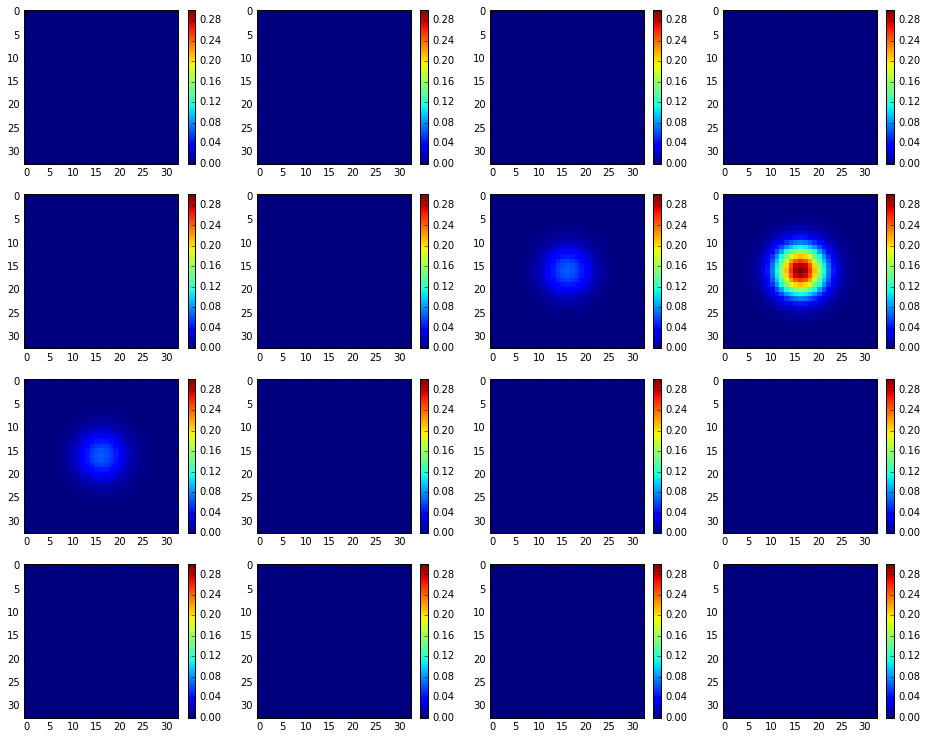

In [123]:
plot_cube(np.reshape(P[:,0], (NXY,NXY,NT)))


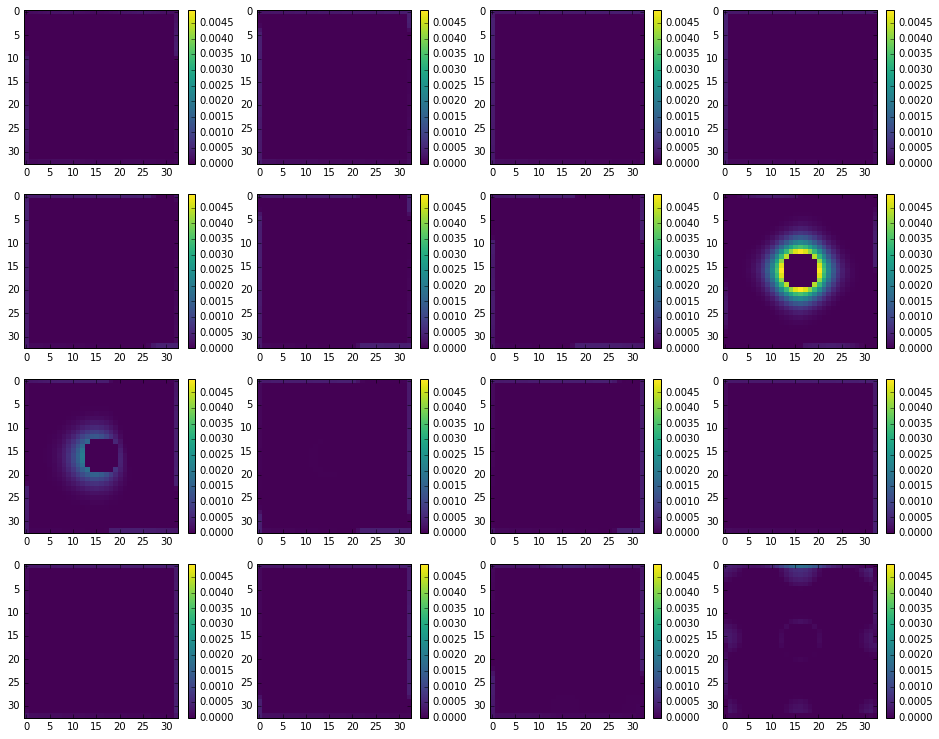

In [126]:
plot_cube(np.reshape(P[:,1], (NXY,NXY,NT)), cmap='viridis')

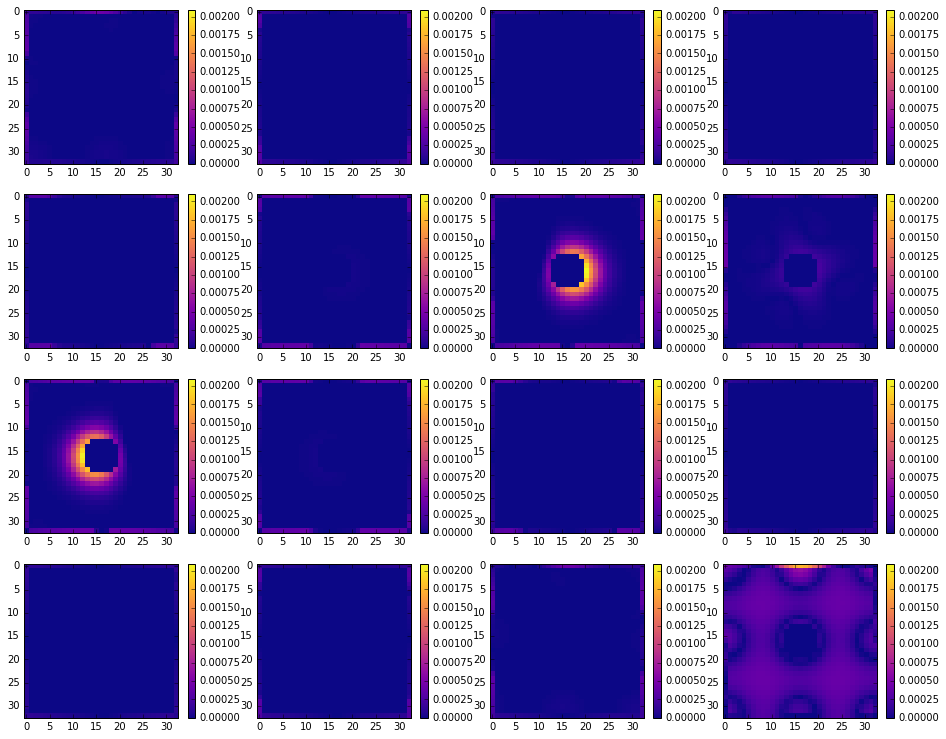

In [124]:
sorted_P = np.sort(P[:,1:])
adv = sorted_P[:,-1] - sorted_P[:,-2]
plot_cube(np.reshape(adv, (NXY,NXY,NT)), cmap='plasma')
